In [1]:
#necessary libraries
import pandas as pd
import os
import numpy as np
import tensorflow as tf

In [2]:
#import dataset
moviesDataset=pd.read_csv(os.path.join(os.path.dirname('__file__'), "movie_metadata.csv"))
moviesDataset

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [3]:
#dataset description
moviesDataset.describe

<bound method NDFrame.describe of                  color       director_name  num_critic_for_reviews  duration  \
0                Color       James Cameron                   723.0     178.0   
1                Color      Gore Verbinski                   302.0     169.0   
2                Color          Sam Mendes                   602.0     148.0   
3                Color   Christopher Nolan                   813.0     164.0   
4                  NaN         Doug Walker                     NaN       NaN   
5                Color      Andrew Stanton                   462.0     132.0   
6                Color           Sam Raimi                   392.0     156.0   
7                Color        Nathan Greno                   324.0     100.0   
8                Color         Joss Whedon                   635.0     141.0   
9                Color         David Yates                   375.0     153.0   
10               Color         Zack Snyder                   673.0     183.0   
11    

In [4]:
#count nulls for each column
moviesDataset.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [5]:
#drop rows where gross and budget elements are null due to the fact that our target column will be derived from these two columns 
test = moviesDataset[moviesDataset.gross.notnull()]

In [6]:
test.isnull().sum()

color                          2
director_name                  3
num_critic_for_reviews         3
duration                       2
director_facebook_likes        3
actor_3_facebook_likes        13
actor_2_name                   6
actor_1_facebook_likes         4
gross                          0
genres                         0
actor_1_name                   4
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  13
facenumber_in_poster           7
plot_keywords                 40
movie_imdb_link                0
num_user_for_reviews           1
language                       3
country                        0
content_rating                64
budget                       268
title_year                     3
actor_2_facebook_likes         6
imdb_score                     0
aspect_ratio                 105
movie_facebook_likes           0
dtype: int64

In [7]:
test.shape

(4159, 28)

In [8]:
test = test[test.budget.notnull()]

In [9]:
test.shape

(3891, 28)

In [10]:
test.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
aspect_ratio                 75
movie_facebook_likes          0
dtype: int64

In [11]:
moviesDataset[moviesDataset.budget.isnull()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
55,Color,Peter Sohn,298.0,93.0,113.0,113.0,Jack McGraw,275.0,123070338.0,Adventure|Animation|Comedy|Family|Fantasy,...,345.0,English,USA,PG,NaN,2015.0,150.0,6.8,2.35,20000
84,Color,Roland Joffé,10.0,109.0,596.0,283.0,Alice Englert,622.0,NaN,Action|Adventure|Romance|Sci-Fi,...,15.0,English,Belgium,R,NaN,2015.0,525.0,4.5,NaN,677
98,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
199,Color,Matt Birch,1.0,NaN,0.0,159.0,Dave Legeno,10000.0,NaN,Action|Fantasy,...,2.0,English,UK,NaN,NaN,2011.0,570.0,7.5,NaN,40
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
206,Color,Matt Birch,4.0,NaN,0.0,1000.0,Toby Jones,10000.0,NaN,Fantasy,...,2.0,English,UK,NaN,NaN,2010.0,2000.0,6.4,NaN,25
260,Color,NaN,29.0,60.0,NaN,432.0,Dirk Benedict,669.0,NaN,Action|Adventure|Crime,...,97.0,English,USA,TV-PG,NaN,NaN,554.0,7.6,4.00,0
279,NaN,Christopher Barnard,NaN,22.0,0.0,NaN,NaN,5.0,NaN,Comedy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,NaN,0
367,Color,Timur Bekmambetov,1.0,141.0,335.0,635.0,Ayelet Zurer,11000.0,NaN,Adventure|Drama|History,...,1.0,English,USA,PG-13,NaN,2016.0,745.0,6.1,2.35,0


In [12]:
moviesDataset.movie_title[moviesDataset.budget.isnull()]

4       Star Wars: Episode VII - The Force Awakens    ...
55                                     The Good Dinosaur 
84                                            The Lovers 
98                                   Godzilla Resurgence 
199        Harry Potter and the Deathly Hallows: Part II 
204                                  Godzilla Resurgence 
206         Harry Potter and the Deathly Hallows: Part I 
260                               The A-Team             
279                              10,000 B.C.             
367                                              Ben-Hur 
404                                 Hannibal             
422                                        All That Jazz 
444                                      Charlotte's Web 
459                                Daredevil             
477                                              Déjà Vu 
479                                Bewitched             
489                                            Evolution 
490           

In [13]:
#project all categories of genre
moviesDataset.genres.unique()

array(['Action|Adventure|Fantasy|Sci-Fi', 'Action|Adventure|Fantasy',
       'Action|Adventure|Thriller', 'Action|Thriller', 'Documentary',
       'Action|Adventure|Sci-Fi', 'Action|Adventure|Romance',
       'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance',
       'Adventure|Family|Fantasy|Mystery', 'Action|Adventure',
       'Action|Adventure|Western', 'Action|Adventure|Family|Fantasy',
       'Action|Adventure|Comedy|Family|Fantasy|Sci-Fi',
       'Adventure|Fantasy', 'Action|Adventure|Drama|History',
       'Adventure|Family|Fantasy', 'Action|Adventure|Drama|Romance',
       'Drama|Romance', 'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Fantasy|Romance',
       'Action|Adventure|Fantasy|Sci-Fi|Thriller',
       'Adventure|Animation|Comedy|Family|Fantasy',
       'Adventure|Animation|Comedy|Family|Sport', 'Action|Crime|Thriller',
       'Action|Adventure|Horror|Sci-Fi|Thriller',
       'Adventure|Animation|Family|Sci-Fi', 'Action|Comedy|Crime|Thriller',
   

In [14]:
#split the before-mentioned elements and convert them as dummies 
cleaned = test.set_index('movie_title').genres.str.split('|', expand=True).stack()

cleaned.reset_index()

,movie_title,level_1,0
0,Avatar,0,Action
1,Avatar,1,Adventure
2,Avatar,2,Fantasy
3,Avatar,3,Sci-Fi
4,Pirates of the Caribbean: At World's End,0,Action
5,Pirates of the Caribbean: At World's End,1,Adventure
6,Pirates of the Caribbean: At World's End,2,Fantasy
7,Spectre,0,Action
8,Spectre,1,Adventure
9,Spectre,2,Thriller


In [15]:
splitGenres = pd.get_dummies(cleaned, prefix='g').groupby(level=0).sum()
splitGenres['index1'] = splitGenres.index

In [16]:
#merge the initial dataset with the above-created columns
test2=pd.merge(test, splitGenres, left_on = 'movie_title', right_on = 'index1')

In [17]:
#drop the columns index1 and genre
test2=test2.drop(['index1', 'genres'], axis = 1)

In [18]:
splitGenres.head()

,g_Action,g_Adventure,g_Animation,g_Biography,g_Comedy,g_Crime,g_Documentary,g_Drama,g_Family,g_Fantasy,...,g_Musical,g_Mystery,g_Romance,g_Sci-Fi,g_Short,g_Sport,g_Thriller,g_War,g_Western,index1
movie_title,,,,,,,,,,,,,,,,,,,,,
10 Cloverfield Lane,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,10 Cloverfield Lane
10 Days in a Madhouse,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,10 Days in a Madhouse
10 Things I Hate About You,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,10 Things I Hate About You
102 Dalmatians,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,102 Dalmatians
10th & Wolf,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,10th & Wolf


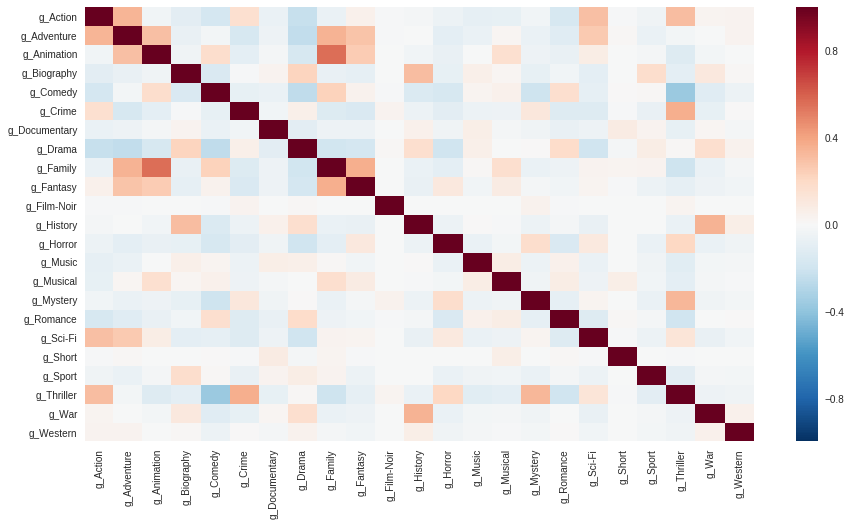

In [19]:
#correlation heatmap for movie Genres 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(1, figsize=(15, 8))
corr = splitGenres.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [20]:
#fill NAs of continuous variables with zeroes and the categorical ones with dots
test3 = test2.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))

In [21]:
#create our dependent column (Y)
test3['blockbuster'] = 0

In [22]:
#find the gross margin so as to classify our entries as blockbuster or not
test3['grossMargin'] = test3['gross']/(test3['budget'] + test3['gross'])

In [23]:
#if gross margin is larger than the threshold=0.7 is considered as blockbuster
test3.loc[test3['grossMargin'] < 0.7, 'blockbuster'] = 0
test3.loc[test3['grossMargin'] >= 0.7, 'blockbuster'] = 1

In [24]:
#drop movie_imdb_link and grossMargin columns
test3 = test3.drop(['movie_imdb_link', 'grossMargin'], axis = 1)

In [25]:
#split categorical and numeric variables in order to find the correlation of numeric variables
categorical_data = test3.select_dtypes(exclude=["number","bool_"])

In [26]:
numeric_dataset = test3._get_numeric_data()

In [27]:
numeric_dataset = numeric_dataset.iloc[:, np.r_[0:16]]


In [28]:
#correlation matrix
numeric_dataset.corr()


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.240153,0.179298,0.257321,0.172685,0.477131,0.600533,0.244125,-0.034861,0.573704,0.107710,0.392195,0.259129,0.340391,0.233158,0.703385
duration,0.240153,1.000000,0.180575,0.128436,0.087750,0.252911,0.343941,0.124798,0.030308,0.356104,0.069227,-0.128051,0.132270,0.358705,0.177688,0.221580
director_facebook_likes,0.179298,0.180575,1.000000,0.119611,0.091673,0.142158,0.301847,0.121031,-0.046954,0.220459,0.019235,-0.045781,0.118477,0.189293,0.051423,0.162555
actor_3_facebook_likes,0.257321,0.128436,0.119611,1.000000,0.254175,0.303451,0.271603,0.490487,0.104975,0.210196,0.041333,0.112049,0.554782,0.064245,0.061053,0.272144
actor_1_facebook_likes,0.172685,0.087750,0.091673,0.254175,1.000000,0.149114,0.183808,0.945236,0.065021,0.127718,0.017618,0.091099,0.392226,0.091584,0.067026,0.131702
gross,0.477131,0.252911,0.142158,0.303451,0.149114,1.000000,0.631404,0.240982,-0.031356,0.552499,0.102179,0.046575,0.256866,0.211525,0.112166,0.375455
num_voted_users,0.600533,0.343941,0.301847,0.271603,0.183808,0.631404,1.000000,0.254050,-0.032144,0.782493,0.068834,0.016773,0.249217,0.473209,0.125238,0.522649
cast_total_facebook_likes,0.244125,0.124798,0.121031,0.490487,0.945236,0.240982,0.254050,1.000000,0.087166,0.185527,0.030189,0.120310,0.643068,0.104546,0.083372,0.206783
facenumber_in_poster,-0.034861,0.030308,-0.046954,0.104975,0.065021,-0.031356,-0.032144,0.087166,1.000000,-0.078746,-0.022028,0.069115,0.073627,-0.067744,0.006420,0.014156
num_user_for_reviews,0.573704,0.356104,0.220459,0.210196,0.127718,0.552499,0.782493,0.185527,-0.078746,1.000000,0.073352,0.011868,0.193021,0.320005,0.141583,0.376885


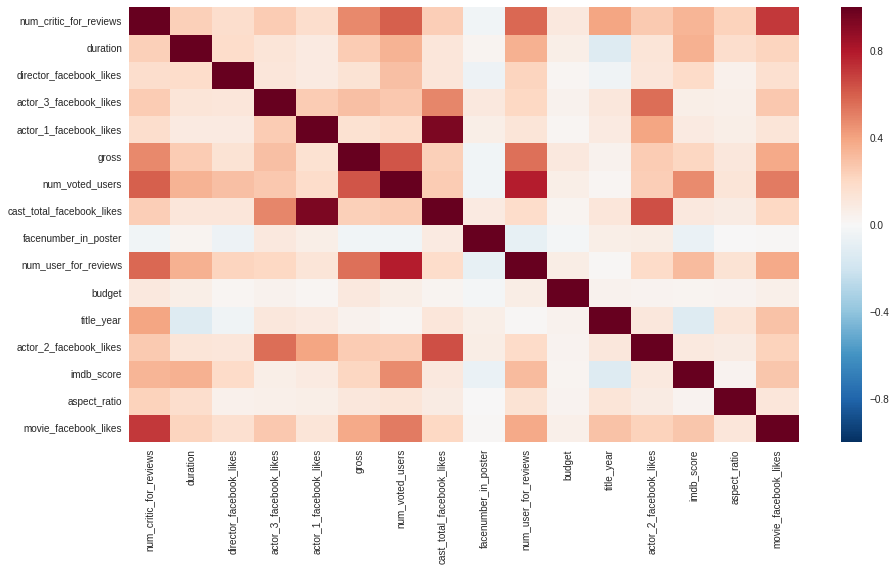

In [29]:
#correlation heatmap for numeric variables 
#import seaborn as sns
#import matplotlib.pyplot as plt
plt.figure(1, figsize=(15, 8))
corr = numeric_dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [30]:
#like stepwise method for variables selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

X = numeric_dataset
Y = test3['blockbuster']
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 25)
fit = rfe.fit(X, Y)
print("Num Features:" + " " + str(fit.n_features_) )
print("Selected Features:" + " " + str(fit.support_) ) 
print("Feature Ranking:" + " " + str(fit.ranking_)) 

Num Features: 16
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [31]:
#according to correlation matrix we drop some variables with high correlation
#also we drop gross and budget since blockbuster contains the information of these two columns
test3 = test3.drop(['country','gross','budget','actor_1_name','actor_2_name','actor_3_name','num_user_for_reviews','cast_total_facebook_likes'], axis=1)

In [32]:
#SET random seed to get the same random results every time for tf AND np
npRandom = np.random.seed(seed=12345)

In [33]:
#split train and test sets
npRandom
msk= np.random.rand(len(test3)) < 0.8

In [34]:
train_dataset = test3[msk]

In [35]:
test_dataset = test3[~msk]

In [36]:
#split the x and y for the train set
x_train = train_dataset.drop('blockbuster', axis=1)
y_train = train_dataset.blockbuster

In [37]:
#use categorical processor in order to convert the catergorical variables in an integer
#form that could be manipulated by tensorflow
from tensorflow.contrib import learn as skflow
cat_processor = skflow.preprocessing.CategoricalProcessor()
x_train = np.array(list(cat_processor.fit_transform(x_train)))
x_train.shape

(3115, 41)

In [38]:
#convert to numpy array
y_train=y_train.values
y_train

array([0, 0, 0, ..., 1, 0, 1])

In [39]:
#split to x and y for test set
x_test = test_dataset.drop('blockbuster', axis=1)
y_test = test_dataset.blockbuster

In [40]:
#convert the categorical to integers
x_test = np.array(list(cat_processor.transform(x_test)))

In [41]:
#convert to numpy array
y_test=y_test.values
y_test

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0,

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import requests
from tensorflow.python.framework import ops
import os.path

In [43]:
ops.reset_default_graph()

# Create graph
sess = tf.Session()

In [44]:
#batch_size = 100
#training_epochs = 10
learning_rate = 0.01
#display_step = 1

In [45]:
#declare placeholder for x and y
x_data = tf.placeholder(shape=[None, 41], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [46]:
#declare weights and biases
W = tf.Variable(tf.zeros([41, 1]))
b = tf.Variable(tf.zeros([1,1]))

In [47]:
#create x*w+b
model_output = tf.add(tf.matmul(x_data, W), b)

In [48]:
#declare loss function and optimizer
loss =tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [49]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [50]:
#declare accuracy
prediction = tf.round(tf.sigmoid(model_output))
predictions_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

In [51]:
#Run the graph
# we do not need learning curve the logistic regression is not learning anything 
# the size is the full training set since we don't have epochs 
# and therefore there is no need for batch_size nor vectors
rand_x = x_train
rand_y = np.transpose([y_train])

temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})

temp_acc_train = sess.run(accuracy, feed_dict={x_data: x_train, y_target: np.transpose([y_train])})

temp_acc_test = sess.run(accuracy, feed_dict={x_data: x_test, y_target: np.transpose([y_test])})

print(' Loss = ' + str(temp_loss),'train acc = '+ str(temp_acc_train),'test_acc='+ str(temp_acc_test))

 Loss = 0.693147 train acc = 0.769181 test_acc=0.737113


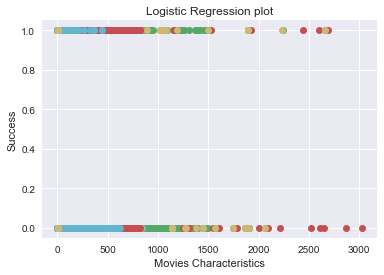

In [88]:
try:
    %matplotlib inline
    # Plot the result
    plt.title('Logistic Regression plot')
    plt.xlabel('Movies Characteristics')
    plt.ylabel('Success')
    plt.plot(x_test, y_test, 'o', label='Data Points')
    plt.plot(x_test, best_fit, 'r-', label='Best fit line', linewidth=3)
except:
        pass

In [66]:
#We also tested to try to train the model following an NN procedure, setting batch size and epochs

In [60]:
batch_size = 100
training_epochs = 10
learning_rate = 0.01
display_step = 1

In [61]:
#Run the graph
loss_vec = []
epochs = []
train_acc = []
test_acc = []
for epoch in range(training_epochs):
    avg_cost = 0.
    rand_index = np.random.choice(len(x_train), size=batch_size)
    rand_x = x_train[rand_index]
    rand_y = np.transpose([y_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    temp_acc_train = sess.run(accuracy, feed_dict={x_data: x_train, y_target: np.transpose([y_train])})
    train_acc.append(temp_acc_train)
    temp_acc_test = sess.run(accuracy, feed_dict={x_data: x_test, y_target: np.transpose([y_test])})
    test_acc.append(temp_acc_test)
    if (epoch+1)%display_step==0:
        print('Epoch:' +str('%04d' % (epoch+1))+ 
              ' Loss = ' + str(temp_loss),'train acc = '+ str(temp_acc_train),'test_acc='+ str(temp_acc_train))

Epoch:0001 Loss = 3605.1 train acc = 0.763857 test_acc=0.763857
Epoch:0002 Loss = 1868.68 train acc = 0.236143 test_acc=0.236143
Epoch:0003 Loss = 12580.4 train acc = 0.763857 test_acc=0.763857
Epoch:0004 Loss = 4970.5 train acc = 0.763857 test_acc=0.763857
Epoch:0005 Loss = 3064.62 train acc = 0.236143 test_acc=0.236143
Epoch:0006 Loss = 14844.0 train acc = 0.763857 test_acc=0.763857
Epoch:0007 Loss = 6653.4 train acc = 0.763857 test_acc=0.763857
Epoch:0008 Loss = 2474.51 train acc = 0.763857 test_acc=0.763857
Epoch:0009 Loss = 6083.24 train acc = 0.236143 test_acc=0.236143
Epoch:0010 Loss = 10599.2 train acc = 0.763857 test_acc=0.763857


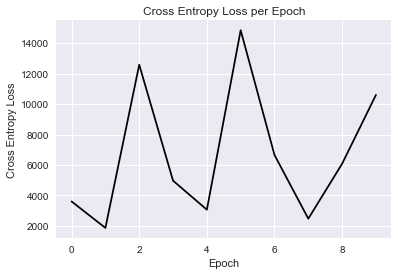

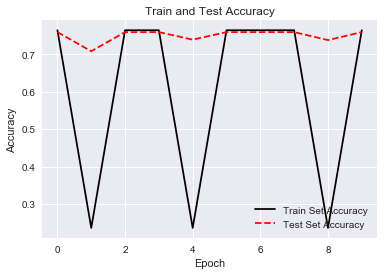

In [62]:
# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Cross Entropy Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.show()

# Plot train and test accuracy
plt.plot(train_acc, 'k-', label='Train Set Accuracy')
plt.plot(test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [63]:
# Get the optimal coefficients
slope = sess.run(W)
y_intercept = sess.run(b)

# Get best fit line
best_fit = []
for i in x_test:
  best_fit.append(slope*i+y_intercept)

Populating the interactive namespace from numpy and matplotlib


C:\Users\Anna-Maria\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


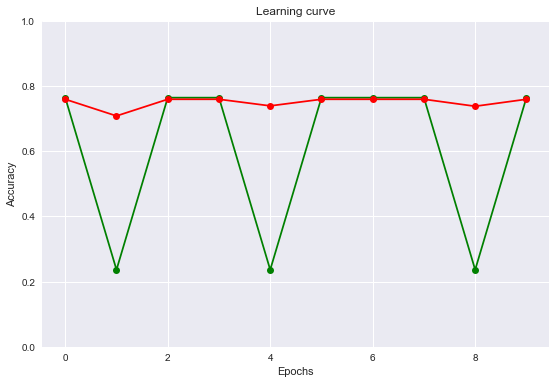

In [64]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 6)
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

fig1 = plt.figure()

ax = fig1.add_subplot(121)
ax.clear()

ax.set_title("Learning curve")
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 1])
ax.plot(train_acc,     'o-', color="g", label="Train Accuracy")
ax.plot(test_acc,   'o-', color="r", label="Test Accuracy")
show()

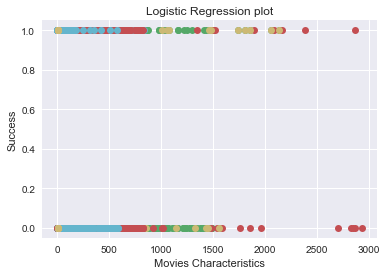

In [65]:
try:
    %matplotlib inline
    # Plot the result
    plt.title('Logistic Regression plot')
    plt.xlabel('Movies Characteristics')
    plt.ylabel('Success')
    plt.plot(x_test, y_test, 'o', label='Data Points')
    plt.plot(x_test, best_fit, 'r-', label='Best fit line', linewidth=3)
except:
        pass